In [151]:
import math
import sklearn
import matplotlib
from sklearn import tree
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [152]:
#method to get feature names from attributes file
def get_features(filename):
    feat_list = []
    fin = open(filename, "r")

    for line in fin:
        attrib = line.strip().split(':')
        feat_list.append(attrib[0])

    return feat_list

In [153]:
feat_names = get_features("car.c45-names")
print(feat_names)

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'label']


In [154]:
cutoff =  math.ceil(len(car_data) * .66) #2/3 | 1/3 split
training_set = car_data[:cutoff] #2/3 for training
test_set = car_data[cutoff:] #1/3 for testing

print(len(training_set))
print(len(test_set))
print(training_set[1])

1141
587
[0, 0, 2, 2, 0, 1]


In [155]:
#break up training instances into features (X) and label (Y)
X_train = [training_set[i][:len(training_set[i])-2] for i in range(len(training_set))]
Y_train = [(training_set[i][len(training_set[i])-1]) for i in range(len(training_set))]
print(X_train[0])
print(feat_names)
print(Y_train[0])

[0, 0, 2, 2]
['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'label']
0


In [156]:
X_test = [test_set[i][:len(test_set[i])-2] for i in range(len(test_set))]
Y_test = [(training_set[i][len(training_set[i])-1]) for i in range(len(training_set))]
print(X_test[0])
print(Y_test[0])

[2, 2, 4, 2]
0


In [157]:
def get_inst_features_from_file(filename):
    instances = []
    fin = open(filename, "r")

    for line in fin:
        inst = []
        data = line.strip().split(",")
        #buying
        if data[0] == "vhigh":
            inst.append(0)
        elif data[0] == "high":
            inst.append(1)
        elif data[0] == "med":
            inst.append(2)
        elif data[0] == "low":
            inst.append(3)
        #maint
        if data[1] == "vhigh":
            inst.append(0)
        elif data[1] == "high":
            inst.append(1)
        elif data[1] == "med":
            inst.append(2)
        elif data[1] == "low":
            inst.append(3)
        #doors
        if data[2] == "5more":
            inst.append(6)
        else:
            inst.append(int(data[2]))
        #persons
        if data[3] == "more":
            inst.append(5)
        else:
            inst.append(int(data[3]))
        #trunk (lug_boot)
        if data[4] == "small":
            inst.append(0)
        elif data[4] == "med":
            inst.append(1)
        elif data[4] == "big":
            inst.append(2)
        #safety
        if data[5] == "low":
            inst.append(0)
        elif data[5] == "med":
            inst.append(1)
        elif data[5] == "high":
            inst.append(2)
        instances.append(inst)

    fin.close()

    return instances

def get_inst_labels_from_file(filename):
    labels = []
    fin = open(filename, "r")

    for line in fin:
        data = line.strip().split(",")
        if data[6] == "unacc":
            labels.append(0)
        elif data[6] == "acc":
            labels.append(1)
        elif data[6] == "good":
            labels.append(2)
        elif data[6] == "vgood":
            labels.append(3)

    fin.close()

    return labels

inst = get_inst_features_from_file("car.data")
label = get_inst_labels_from_file("car.data")
print(len(inst))
print(len(label))

1728
1728


0.9143518518518519


[Text(0.25, 0.9, 'x[3] <= 3.0\nentropy = 1.336\nsamples = 1296\nvalue = [850, 312, 69, 65]'),
 Text(0.125, 0.7, 'entropy = 0.0\nsamples = 432\nvalue = [432, 0, 0, 0]'),
 Text(0.375, 0.7, 'x[5] <= 0.5\nentropy = 1.609\nsamples = 864\nvalue = [418, 312, 69, 65]'),
 Text(0.25, 0.5, 'entropy = 0.0\nsamples = 288\nvalue = [288, 0, 0, 0]'),
 Text(0.5, 0.5, 'x[0] <= 1.5\nentropy = 1.686\nsamples = 576\nvalue = [130, 312, 69, 65]'),
 Text(0.25, 0.3, 'x[1] <= 0.5\nentropy = 0.989\nsamples = 192\nvalue = [84, 108, 0, 0]'),
 Text(0.125, 0.1, 'entropy = 0.0\nsamples = 48\nvalue = [48, 0, 0, 0]'),
 Text(0.375, 0.1, 'entropy = 0.811\nsamples = 144\nvalue = [36, 108, 0, 0]'),
 Text(0.75, 0.3, 'x[1] <= 1.5\nentropy = 1.73\nsamples = 384\nvalue = [46, 204, 69, 65]'),
 Text(0.625, 0.1, 'entropy = 1.053\nsamples = 192\nvalue = [38, 141, 0, 13]'),
 Text(0.875, 0.1, 'entropy = 1.76\nsamples = 192\nvalue = [8, 63, 69, 52]')]

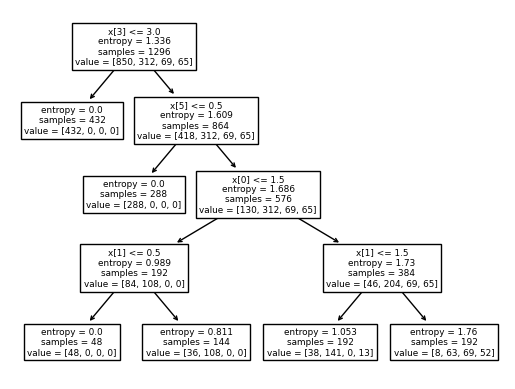

In [158]:
data = get_inst_features_from_file("car.data")
labels = get_inst_labels_from_file("car.data")

#chose to cutoff the backend of data for training since first several hundred instances are mostly labeled as 0
cutoff =  math.ceil(len(data) * .25) #75% | 25% split
training_set_x = data[cutoff:] #75% for training
training_set_y = labels[cutoff:]
test_set_x = data[:cutoff] #25% for testing
test_set_y = labels[:cutoff]
# print(training_set_x[0])
# print(training_set_y)
# print(test_set_x[0])
# print(test_set_y)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)
clf = clf.fit(training_set_x, training_set_y)


pred = clf.predict(test_set_x)
print(metrics.accuracy_score(test_set_y, pred))

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(training_set_x, training_set_y)
tree.plot_tree(clf)

In [159]:
from sklearn.model_selection import train_test_split
car_data = get_inst_features_from_file("car.data")
labels = get_inst_labels_from_file("car.data")


X_train, X_test, y_train, y_test = train_test_split(car_data, labels, test_size=0.25, random_state=16)
print(X_test[0])
print(y_train)

[0, 0, 3, 4, 2, 1]
[3, 0, 1, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 3, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 3, 1, 2, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,

In [160]:
#logistic regression
#link to where I got this from https://www.datacamp.com/tutorial/understanding-logistic-regression-python
#not sure if it looks right for what it is returning
logreg = LogisticRegression(random_state=16, solver='newton-cg')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(len(X_test))
print(y_pred)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

432
[0 0 0 0 0 0 0 1 3 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 2 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 3 2 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 3 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 2 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 1 1 3 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 2 0 3 2 0 1 1 0 0 3 0 0 3 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 1 2 0 1 1 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 3 1 0 0 0 0 1 1
 1 0 1 1 0 3 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 0 0 0 1 0 1 0 0 0 3 3 1 1 0 0 0 0 0 1 1 0 0 0 3 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 1 1 3 0 0 0 0 0 0 0 0 0 0 0]


array([[288,   9,   2,   0],
       [ 35,  64,   0,   1],
       [  1,   6,   8,   0],
       [  0,   5,   1,  12]], dtype=int64)

In [232]:
car_data = get_data_from_file("car.data")


In [161]:
def get_entropy(instances, class1, class2, class3, class4):
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    # HINT: Get counts for both classes
    for x in instances:
        # print(x[len(x)-1])  
        if(x[len(x)-1] == class1):
            count1 += 1
        elif(x[len(x)-1] == class2): 
            count2 += 1
        elif(x[len(x)-1] == class3):
            count3 += 1
        elif(x[len(x)-1] == class4):
            count4 += 1
    
    # HINT: Get class count for both classes
    ent1 = 0
    ent2 = 0
    ent3 = 0
    ent4 = 0
    total = len(instances)
    if(total != 0):
            ent1 = count1/total
            ent2 = count2/total
            ent3 = count3/total
            ent4 = count4/total    
    # HINT: Be careful! Remember that log(0) is undefined (regardless of the log's base)
    if ent1 == 0 or ent2 == 0 or ent3 == 0 or ent4 == 0:
        ent = 0
    else:
        ent = - ent1 * math.log2(ent1) - ent2 * math.log2(ent2) - ent3 * math.log2(ent3) - ent4 * math.log2(ent4)
    return ent

In [162]:
def get_cond_entropy(instances, feat_index, feat_vals, class1, class2, class3, class4):
    num_inst = len(instances)
    total_entropy = 0.0
    # HINT: Iterate over all feat_vals (i.e., all values the current feature--feat_index--can take on).
    for feat_val in feat_vals:
        subset = []
        for instance in instances:
            if instance[feat_index] == feat_val:
                subset.append(instance)

    # HINT: Calculate probability of attribute taking on this value.
    prob_feat = len(subset) / num_inst
    
    subset_entropy = get_entropy(subset, class1, class2,class3,class4)

    if subset_entropy is not None:
        calc = prob_feat * subset_entropy
        total_entropy += calc

    return total_entropy

In [233]:
def get_info_gain(instances, feat_index, feat_vals, class1, class2, class3, class4):
   # HINT: you should be able to just call your entropy and conditional entropy
    #         functions you've already coded.    info_gain = 0
    entropy = get_entropy(instances, 'unacc', 'acc', 'good', 'vgood')
    cond_entropy = get_cond_entropy(instances, feat_index,feat_vals,class1,class2,class3,class4)
    print(entropy)
    print(cond_entropy)
    if entropy is not None:
        info_gain = entropy - cond_entropy
    
    return info_gain

In [234]:
all_IGs = []
c1,c2,c3,c4 = car_attribs[len(car_attribs)-1]
print("c1,c2,c3,c4: ", c1,c2,c3,c4)  # Two class values

for i in range(len(car_attribs)-1):
    all_IGs.append(get_info_gain(car_data, i, car_attribs[i],c1,c2,c3,c4))

c1,c2,c3,c4:  unacc acc good vgood
1.2057409700121753
0.3927430307668745
1.2057409700121753
0.37264844634513844
1.2057409700121753
0.0
1.2057409700121753
0.492504696573998
1.2057409700121753
0.4570720931604722
1.2057409700121753
0.5385039498598707


In [235]:
print(all_IGs)

[0.8129979392453008, 0.8330925236670368, 1.2057409700121753, 0.7132362734381773, 0.7486688768517031, 0.6672370201523046]
